In [1]:
# for basic operations
import numpy as np
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/My Drive/Colab Notebooks/

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/Colab Notebooks


In [3]:
df = pd.read_csv("data/df.csv")

df.head()

,index,product_id,product_type,product_name,size,colour,price,quantity_available_product,description,customer_id,...,quantity_product_sales,total_price,profit_per_product (dollar),total_profit (dollars),discount_per_product,profit_per_product_official,season,delivery_time (days),year_month,sales
0,0,218,Shirt,Chambray,L,orange,105,44,"A orange coloured, L sized, Chambray Shirt",64,...,2,212,1,2,0.00,0.95,Winter,25,2021-08-01,4620
1,1,481,Jacket,Puffer,S,indigo,110,62,"A indigo coloured, S sized, Puffer Jacket",64,...,1,118,8,8,0.00,7.27,Winter,25,2021-08-01,6820
2,2,2,Shirt,Oxford Cloth,M,red,114,54,"A red coloured, M sized, Oxford Cloth Shirt",64,...,3,288,0,0,15.79,0.00,Winter,25,2021-08-01,6156
3,3,1002,Trousers,Wool,M,blue,111,52,"A blue coloured, M sized, Wool Trousers",64,...,2,212,0,0,4.50,0.00,Winter,25,2021-08-01,5772
4,4,691,Jacket,Parka,S,indigo,119,53,"A indigo coloured, S sized, Parka Jacket",64,...,3,339,0,0,5.04,0.00,Winter,25,2021-08-01,6307


In [4]:
df.dtypes

index                            int64
product_id                       int64
product_type                    object
product_name                    object
size                            object
colour                          object
price                            int64
quantity_available_product       int64
description                     object
customer_id                      int64
gender                          object
age                              int64
city                            object
state                           object
order_id                         int64
order_date                      object
delivery_date                   object
sales_id                         int64
price_per_unit                   int64
quantity_product_sales           int64
total_price                      int64
profit_per_product (dollar)      int64
total_profit (dollars)           int64
discount_per_product           float64
profit_per_product_official    float64
season                   

convert to datetime

after checking data types above, time series transformation will be carried out in columns 'order_date' and 'delivery_date' to convert to datetime type

check the data type of each value in the time series column

In [5]:
df_ts = ['order_date','delivery_date']

for i in df_ts:
    print('type',i,'before transformation is ',type(df[i][0]))

type order_date before transformation is  <class 'str'>
type delivery_date before transformation is  <class 'str'>


In [6]:
for i in df_ts:
    df[i] = pd.to_datetime(df[i],  format='%Y/%m/%d')
    print('type',i,'after transformation is ',type(df[i][0]))

type order_date after transformation is  <class 'pandas._libs.tslibs.timestamps.Timestamp'>
type delivery_date after transformation is  <class 'pandas._libs.tslibs.timestamps.Timestamp'>


check data types

In [7]:
df.dtypes

index                                   int64
product_id                              int64
product_type                           object
product_name                           object
size                                   object
colour                                 object
price                                   int64
quantity_available_product              int64
description                            object
customer_id                             int64
gender                                 object
age                                     int64
city                                   object
state                                  object
order_id                                int64
order_date                     datetime64[ns]
delivery_date                  datetime64[ns]
sales_id                                int64
price_per_unit                          int64
quantity_product_sales                  int64
total_price                             int64
profit_per_product (dollar)       

# 1. Sales Forecasting (continue)

## 1.1 Import some necessary libraries

In [8]:
 !pip install pmdarima

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

## 1.2 Preparing

In [10]:
# daily sales

df_dl = df.groupby(['order_date','season','product_type'], as_index=False)['quantity_product_sales'].sum()
df_dl['order_date'] = df['order_date'].dt.date

# pivot
df_dl_p = (
    df_dl
    .pivot_table(columns='product_type',index=['order_date','season'],aggfunc=np.sum,margins=True)['quantity_product_sales']
)

# Formatting.
df_dl_p.reset_index(inplace=True)
df_dl_p.columns.name = None

df_dl_p.columns = ['order_date','season','jacket','shirt','trousers','total_sales']
df_dl_p

,order_date,season,jacket,shirt,trousers,total_sales
0,2021-01-01,Summer,35.0,31.0,29.0,95
1,2021-01-03,Autumn,5.0,11.0,8.0,24
2,2021-01-05,Spring,6.0,29.0,22.0,57
3,2021-01-07,Autumn,13.0,11.0,9.0,33
4,2021-01-08,Winter,10.0,27.0,10.0,47
...,...,...,...,...,...,...
156,2021-10-18,Winter,33.0,14.0,15.0,62
157,2021-10-21,Spring,30.0,28.0,18.0,76
158,2021-10-22,Autumn,30.0,28.0,20.0,78
159,2021-10-22,Winter,6.0,NaN,4.0,10


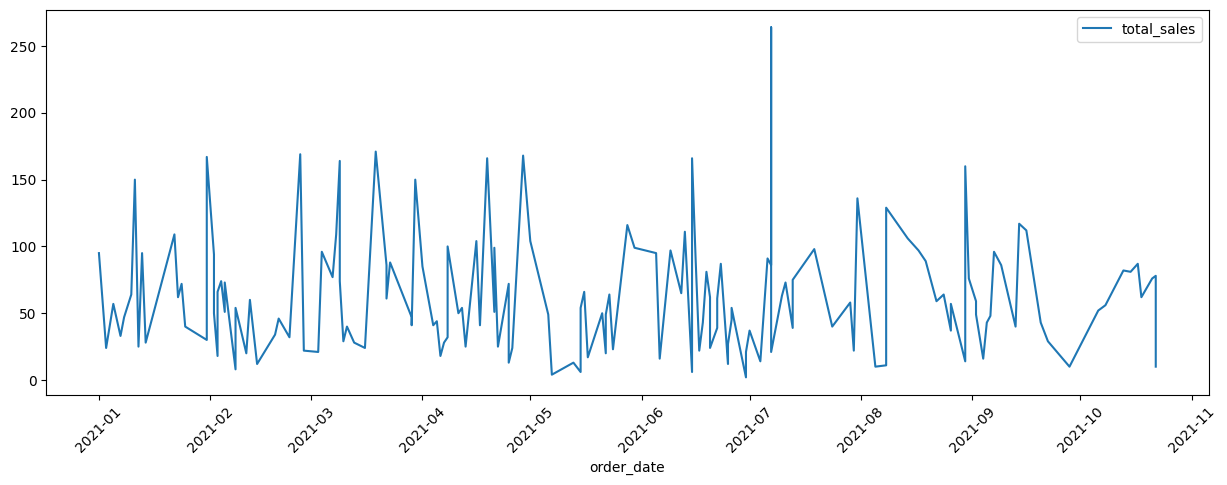

In [11]:
df_dl_p[:-1].plot(x='order_date', y='total_sales', figsize=(15,5))
plt.xticks(rotation=45)
plt.show()

In [12]:
# monthly sales

df['year_month'] = pd.to_datetime(df['year_month']).dt.date
df_tm = df.groupby(['year_month','season','product_type'], as_index=False)['quantity_product_sales'].sum()

# pivot
df_tm_p = (
    df_tm
    .pivot_table(columns='product_type',index=['year_month','season'],aggfunc=np.sum,margins=True)['quantity_product_sales']
)

# Formatting.
df_tm_p.reset_index(inplace=True)
df_tm_p.columns.name = None

df_tm_p.columns = ['year_month','season','jacket','shirt','trousers','total_sales']
df_tm_p

,year_month,season,jacket,shirt,trousers,total_sales
0,2021-01-01,Summer,395,353,395,1143
1,2021-02-01,Summer,316,268,336,920
2,2021-03-01,Autumn,427,412,425,1264
3,2021-04-01,Autumn,318,331,295,944
4,2021-05-01,Autumn,289,237,303,829
5,2021-06-01,Winter,305,347,330,982
6,2021-07-01,Winter,360,404,358,1122
7,2021-08-01,Winter,355,321,332,1008
8,2021-09-01,Spring,332,317,287,936
9,2021-10-01,Spring,246,269,299,814


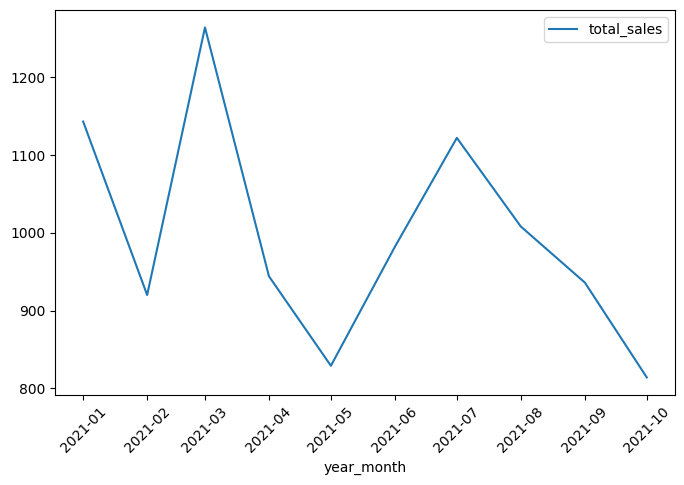

In [13]:
df_tm_p[:-1].plot(x='year_month', y='total_sales', figsize=(8,5))
plt.xticks(rotation=45)
plt.show()

**Dickey-Fuller Test**

In [14]:
#applying dickey-fuller test
from statsmodels.tsa.stattools import adfuller

#creating a function for values
def adf_test(dataset):
  dftest = adfuller(dataset, autolag = 'AIC')
  print("1. ADF : ",dftest[0])
  print("2. P-Value : ", dftest[1])
  print("3. Num Of Lags : ", dftest[2])
  print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
  print("5. Critical Values :")
  for key, val in dftest[4].items():
      print("\t",key, ": ", val)

  if dftest[1] <= 0.05:
     print ("time series is stationary")
  else:
      print("time series is non-stationary")

#printing for total_sales
adf_test(df_tm_p[:-1]['total_sales'])

1. ADF :  -29.25278641636878
2. P-Value :  0.0
3. Num Of Lags :  3
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 6
5. Critical Values :
	 1% :  -5.354256481481482
	 5% :  -3.6462381481481483
	 10% :  -2.901197777777778
time series is stationary


## 1.3 Arma


### 1.3.1. Splitting Data


<ipython-input-15-65b42cfcf6f9>:3: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  train = df_f[df_f['year_month'] <= pd.to_datetime('2021-06', format='%Y-%m')]
<ipython-input-15-65b42cfcf6f9>:4: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  test = df_f[df_f['year_month'] >= pd.to_datetime('2021-06', format='%Y-%m')]


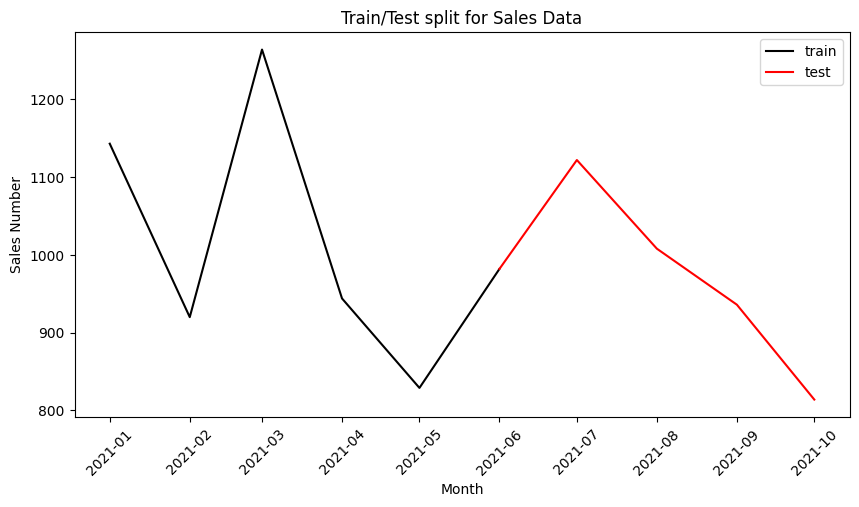

In [15]:
df_f = df_tm_p[:-1]

train = df_f[df_f['year_month'] <= pd.to_datetime('2021-06', format='%Y-%m')]
test = df_f[df_f['year_month'] >= pd.to_datetime('2021-06', format='%Y-%m')]

# plot
plt.figure(figsize=(10,5))
plt.plot( train['year_month'], train['total_sales'], color = "black", label="train")
plt.plot(test['year_month'], test['total_sales'], color = "red", label="test")
plt.title("Train/Test split for Sales Data")
plt.ylabel("Sales Number")
plt.xlabel('Month')
plt.xticks(rotation=45)
plt.legend()
plt.show()

### 1.3.2 Train Model

In [16]:
month_predicted = [*range(5, 13, 1)]

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
<ipython-input-17-59dcf478c613>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_pred_df['year_month'][10] = pd.to_datetime('2021-11', format='%Y-%m')
<ipython-input-17-59dcf478c613>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_pred_df['year_month'][11] = pd.to_datetime('2021-12', format='%Y-%m')
<ipython-input-17-59dcf478c613>:23: SettingWithCopyWarning: 
A value is trying to be set on a co

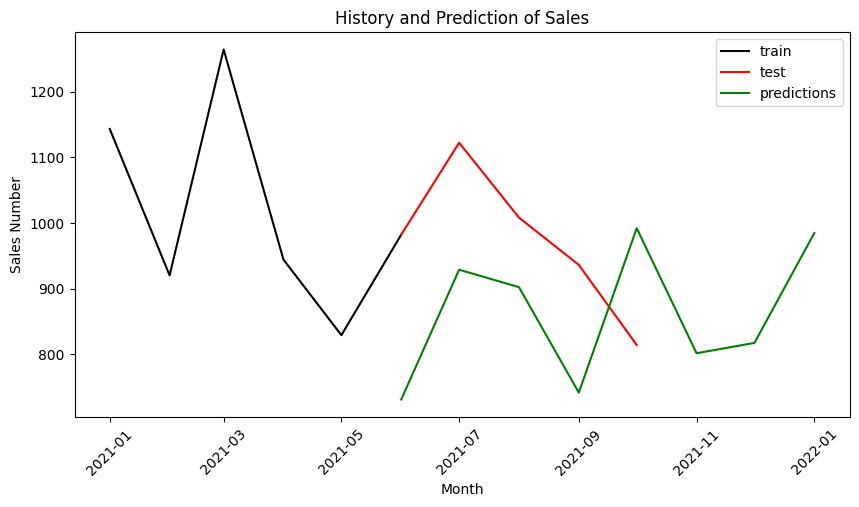

In [17]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

y = train['total_sales']

ARMAmodel = SARIMAX(y, order = (3,0,1))
ARMAmodel = ARMAmodel.fit()

# prediction
y_pred = ARMAmodel.get_forecast(len(month_predicted))
y_pred_df = y_pred.conf_int(alpha = 0.05)
y_pred_df["predictions"] = ARMAmodel.predict(end = 13)
y_pred_df.index = month_predicted
y_pred_out = y_pred_df["predictions"]



# modif month
y_pred_df['year_month'] = test['year_month']
# d = pd.date_range(start='11/1/2021', end='1/1/2022', freq='MS')
# y_pred_df['year_month'] = d
y_pred_df['year_month'][10] = pd.to_datetime('2021-11', format='%Y-%m')
y_pred_df['year_month'][11] = pd.to_datetime('2021-12', format='%Y-%m')
y_pred_df['year_month'][12] = pd.to_datetime('2022-01', format='%Y-%m')

# plot
plt.figure(figsize=(10,5))
plt.plot( train['year_month'], train['total_sales'], color = "black", label="train")
plt.plot(test['year_month'], test['total_sales'], color = "red", label="test")
plt.plot(y_pred_df['year_month'], y_pred_df['predictions'], color='green', label = 'predictions')
plt.title("History and Prediction of Sales")
plt.ylabel("Sales Number")
plt.xlabel('Month')
plt.xticks(rotation=45)
plt.legend()
plt.show()

### 1.3.3 Model Evaluation

In [18]:
from math import sqrt
from sklearn.metrics import mean_squared_error

rms = sqrt(mean_squared_error(test['total_sales'],y_pred_df['predictions'][0:5]))
print("RMSE: ", rms)

RMSE:  190.31318646889005


## 1.4 Arima with auto_arima

### 1.4.1 Splitting Data

<ipython-input-19-7c7cbedfbb0c>:3: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  train = df_f[df_f['year_month'] < pd.to_datetime('2021-05', format='%Y-%m')]
<ipython-input-19-7c7cbedfbb0c>:4: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  test = df_f[df_f['year_month'] >= pd.to_datetime('2021-05', format='%Y-%m')]


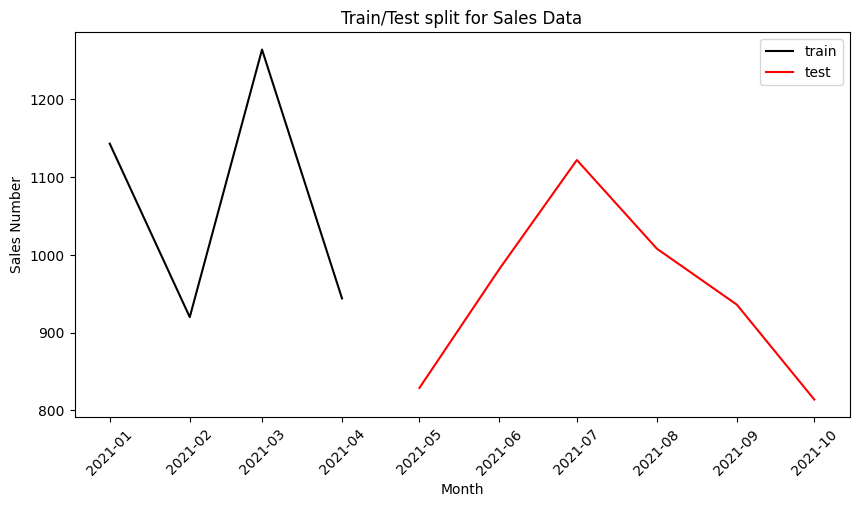

In [19]:
df_f = df_tm_p[:-1]

train = df_f[df_f['year_month'] < pd.to_datetime('2021-05', format='%Y-%m')]
test = df_f[df_f['year_month'] >= pd.to_datetime('2021-05', format='%Y-%m')]

# plot
plt.figure(figsize=(10,5))
plt.plot( train['year_month'], train['total_sales'], color = "black", label="train")
plt.plot(test['year_month'], test['total_sales'], color = "red", label="test")
plt.title("Train/Test split for Sales Data")
plt.ylabel("Sales Number")
plt.xlabel('Month')
plt.xticks(rotation=45)
plt.legend()
plt.show()

### 1.4.2 Train Model

In [20]:
import scipy.signal.signaltools

def _centered(arr, newsize):
    # Return the center newsize portion of the array.
    newsize = np.asarray(newsize)
    currsize = np.array(arr.shape)
    startind = (currsize - newsize) // 2
    endind = startind + newsize
    myslice = [slice(startind[k], endind[k]) for k in range(len(endind))]
    return arr[tuple(myslice)]

scipy.signal.signaltools._centered = _centered

In [21]:
month_predicted = [*range(4, 13, 1)]

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.20 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=55.031, Time=0.23 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=51.509, Time=0.07 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.11 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=69.209, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=63.432, Time=0.04 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 0.673 seconds


<ipython-input-22-fc46686f5150>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  forecast['year_month'][10] = pd.to_datetime('2021-11', format='%Y-%m')
<ipython-input-22-fc46686f5150>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  forecast['year_month'][11] = pd.to_datetime('2021-12', format='%Y-%m')
<ipython-input-22-fc46686f5150>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  forecast['year_month'][12] = pd.to_datetime('2022-0

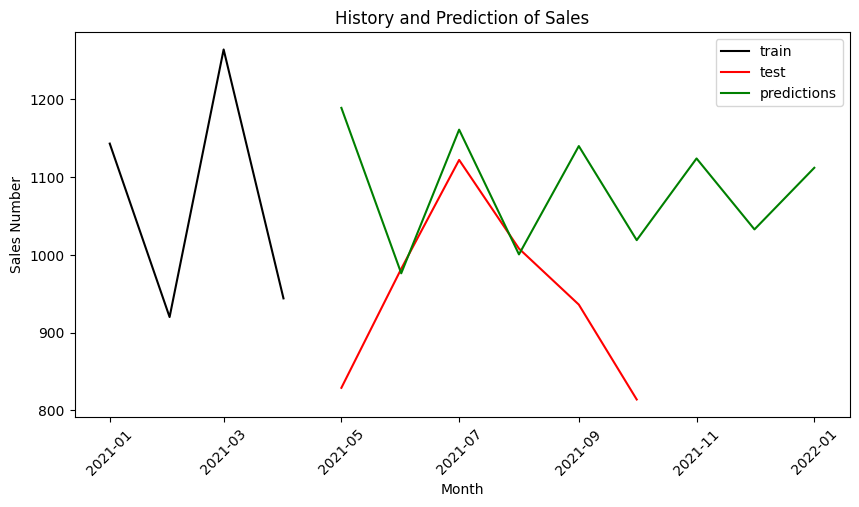

In [22]:
from pmdarima.arima import auto_arima

y = train['total_sales']

model = auto_arima(y, trace=True, error_action='ignore', suppress_warnings=True)
model.fit(y)

# prediction
forecast = model.predict(n_periods=len(month_predicted))
forecast = pd.DataFrame(forecast,index = month_predicted,columns=['predictions'])
forecast.index = month_predicted
forecast_out = forecast['predictions']

# modif month
forecast['year_month'] = test['year_month']
forecast['year_month'][10] = pd.to_datetime('2021-11', format='%Y-%m')
forecast['year_month'][11] = pd.to_datetime('2021-12', format='%Y-%m')
forecast['year_month'][12] = pd.to_datetime('2022-01', format='%Y-%m')

# plot
plt.figure(figsize=(10,5))
plt.plot( train['year_month'], train['total_sales'], color = "black", label="train")
plt.plot(test['year_month'], test['total_sales'], color = "red", label="test")
plt.plot(forecast['year_month'], forecast['predictions'], color='green', label = 'predictions')
plt.title("History and Prediction of Sales")
plt.ylabel("Sales Number")
plt.xlabel('Month')
plt.xticks(rotation=45)
plt.legend()
plt.show()

### 1.4.3 Model Evaluation

In [23]:
from math import sqrt
from sklearn.metrics import mean_squared_error

rms = sqrt(mean_squared_error(test['total_sales'],forecast['predictions'][0:6]))
print("RMSE: ", rms)

RMSE:  189.15403589685783


## 1.5 Arima

### 1.5.1 Splitting Data

<ipython-input-24-65b42cfcf6f9>:3: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  train = df_f[df_f['year_month'] <= pd.to_datetime('2021-06', format='%Y-%m')]
<ipython-input-24-65b42cfcf6f9>:4: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  test = df_f[df_f['year_month'] >= pd.to_datetime('2021-06', format='%Y-%m')]


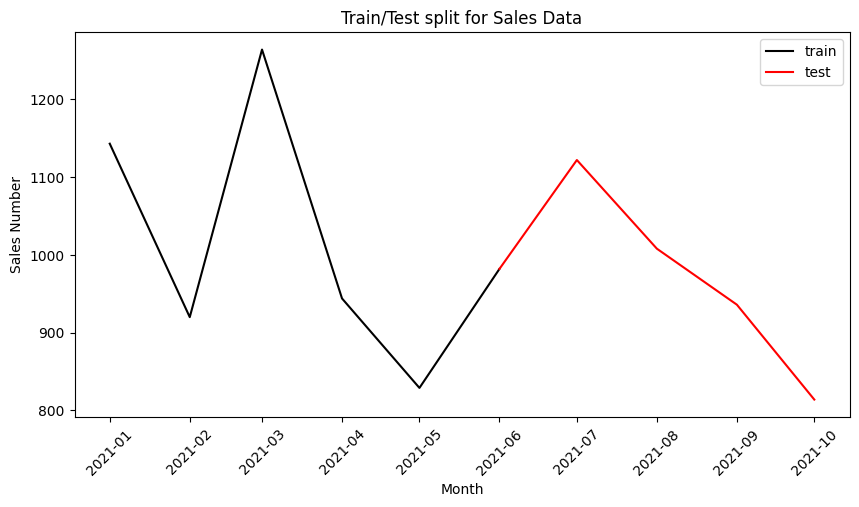

In [24]:
df_f = df_tm_p[:-1]

train = df_f[df_f['year_month'] <= pd.to_datetime('2021-06', format='%Y-%m')]
test = df_f[df_f['year_month'] >= pd.to_datetime('2021-06', format='%Y-%m')]

# plot
plt.figure(figsize=(10,5))
plt.plot( train['year_month'], train['total_sales'], color = "black", label="train")
plt.plot(test['year_month'], test['total_sales'], color = "red", label="test")
plt.title("Train/Test split for Sales Data")
plt.ylabel("Sales Number")
plt.xlabel('Month')
plt.xticks(rotation=45)
plt.legend()
plt.show()

### 1.5.2 Train Model


In [25]:
month_predicted = [*range(5, 13, 1)]

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
<ipython-input-26-26f8c303ce4e>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_pred_df['year_month'][10] = pd.to_datetime('2021-11', format='%Y-%m')
<ipython-input-26-26f8c303ce4e>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats i

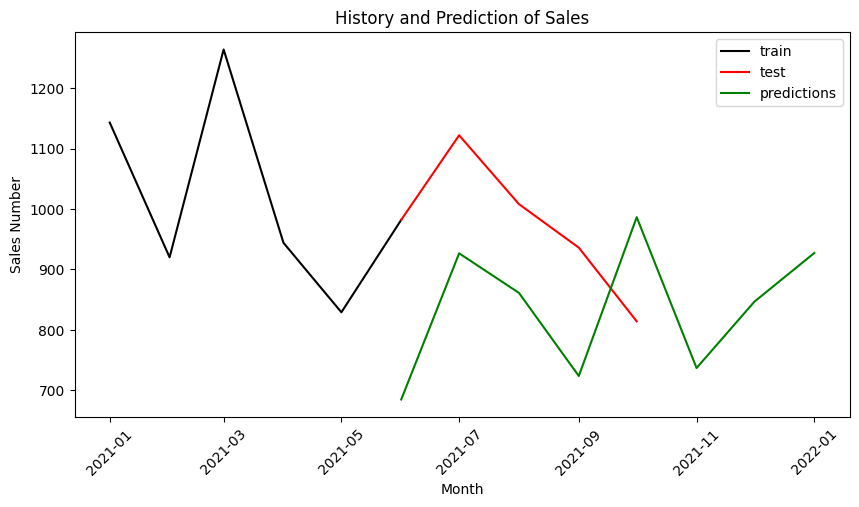

In [26]:
from statsmodels.tsa.arima.model import ARIMA

y = train['total_sales']

ARIMAmodel = ARIMA(y, order = (2, 1, 2))
ARIMAmodel = ARIMAmodel.fit()

# prediction
y_pred = ARIMAmodel.get_forecast(len(month_predicted))
y_pred_df = y_pred.conf_int(alpha = 0.05)
y_pred_df["predictions"] = ARIMAmodel.predict(end = 13)
y_pred_df.index = month_predicted
y_pred_out = y_pred_df["predictions"]

# modif month
y_pred_df['year_month'] = test['year_month']
y_pred_df['year_month'][10] = pd.to_datetime('2021-11', format='%Y-%m')
y_pred_df['year_month'][11] = pd.to_datetime('2021-12', format='%Y-%m')
y_pred_df['year_month'][12] = pd.to_datetime('2022-01', format='%Y-%m')

# plot
plt.figure(figsize=(10,5))
plt.plot( train['year_month'], train['total_sales'], color = "black", label="train")
plt.plot(test['year_month'], test['total_sales'], color = "red", label="test")
plt.plot(y_pred_df['year_month'], y_pred_df['predictions'], color='green', label = 'predictions')
plt.title("History and Prediction of Sales")
plt.ylabel("Sales Number")
plt.xlabel('Month')
plt.xticks(rotation=45)
plt.legend()
plt.show()

### 1.5.3 Model Evaluation

In [27]:
from math import sqrt
from sklearn.metrics import mean_squared_error

rms = sqrt(mean_squared_error(test['total_sales'],y_pred_df['predictions'][0:5]))
print("RMSE: ", rms)

RMSE:  211.20816449749827


## 1.6 Arima with best fit AIC -pdq/s by grid search

### 1.6.1 Splitting Data

<ipython-input-28-7032f859a4f9>:3: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  train = df_f[df_f['year_month'] <= pd.to_datetime('2021-06', format='%Y-%m')]
<ipython-input-28-7032f859a4f9>:4: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  test = df_f[df_f['year_month'] >= pd.to_datetime('2021-06', format='%Y-%m')]


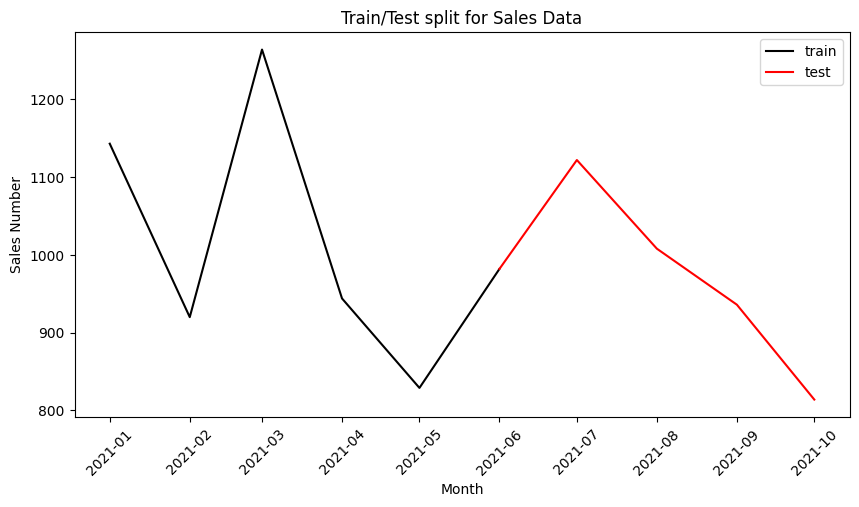

In [28]:
df_f = df_tm_p[:-1]

train = df_f[df_f['year_month'] <= pd.to_datetime('2021-06', format='%Y-%m')]
test = df_f[df_f['year_month'] >= pd.to_datetime('2021-06', format='%Y-%m')]

# plot
plt.figure(figsize=(10,5))
plt.plot( train['year_month'], train['total_sales'], color = "black", label="train")
plt.plot(test['year_month'], test['total_sales'], color = "red", label="test")
plt.title("Train/Test split for Sales Data")
plt.ylabel("Sales Number")
plt.xlabel('Month')
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [29]:
month_predicted = [*range(5, 10, 1)]

In [30]:
from statsmodels.tsa.arima_model import ARIMA
import itertools
import warnings

y = train['total_sales'].astype('float32')
# evaluate an ARIMA model for a given order (p,d,q)
def evaluate_arima_model(X, arima_order):
 # prepare training dataset
 train_size = int(len(X) * 0.66)
 train, test = X[0:train_size], X[train_size:]
 history = [x for x in train]
 # make predictions
 predictions = list()
 for t in range(len(test)):
  model = ARIMA(history, order=arima_order)
  model_fit = model.fit()
  yhat = model_fit.forecast()[0]
  predictions.append(yhat)
  history.append(test[t])
 # calculate out of sample error
 rmse = sqrt(mean_squared_error(test, predictions))
 return rmse

# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
 dataset = dataset.astype('float32')
 best_score, best_cfg = float("inf"), None
 for p in p_values:
  for d in d_values:
    for q in q_values:
      order = (p,d,q)
      try:
        rmse = evaluate_arima_model(dataset, order)
        if rmse < best_score:
          best_score, best_cfg = rmse, order
        print('ARIMA%s RMSE=%.3f' % (order,rmse))
      except:
        continue
 print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))


# evaluate parameters
p_values = [0, 1, 2, 4, 6, 8, 10]
d_values = range(0, 3)
q_values = range(0, 3)
warnings.filterwarnings("ignore")
evaluate_models(y, p_values, d_values, q_values)


Best ARIMANone RMSE=inf


We can not find best grid search in this model

# 1.6 Sarima with best fit AIC -pdq/s by grid search

### 1.6.1 Splitting Data

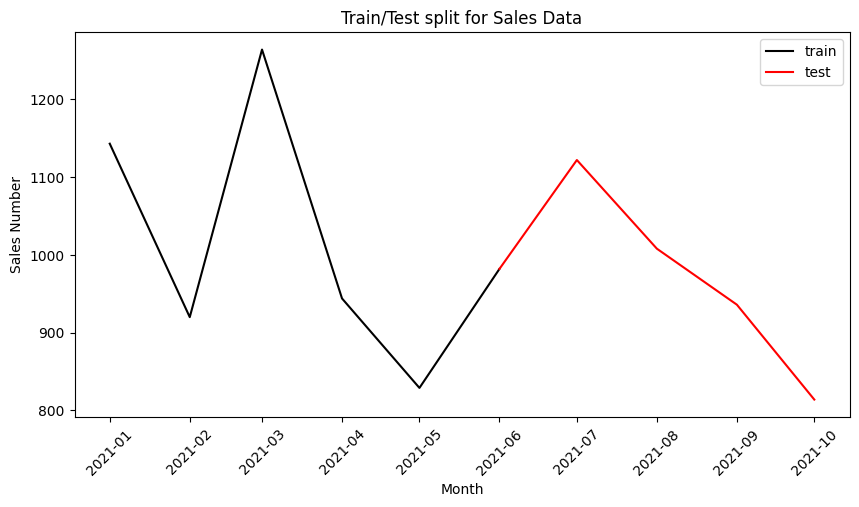

In [36]:
df_f = df_tm_p[:-1]

train = df_f[df_f['year_month'] <= pd.to_datetime('2021-06', format='%Y-%m')]
test = df_f[df_f['year_month'] >= pd.to_datetime('2021-06', format='%Y-%m')]

# plot
plt.figure(figsize=(10,5))
plt.plot( train['year_month'], train['total_sales'], color = "black", label="train")
plt.plot(test['year_month'], test['total_sales'], color = "red", label="test")
plt.title("Train/Test split for Sales Data")
plt.ylabel("Sales Number")
plt.xlabel('Month')
plt.xticks(rotation=45)
plt.legend()
plt.show()


### 1.6.2 Train Model

In [37]:
month_predicted = [*range(6, 13, 1)]

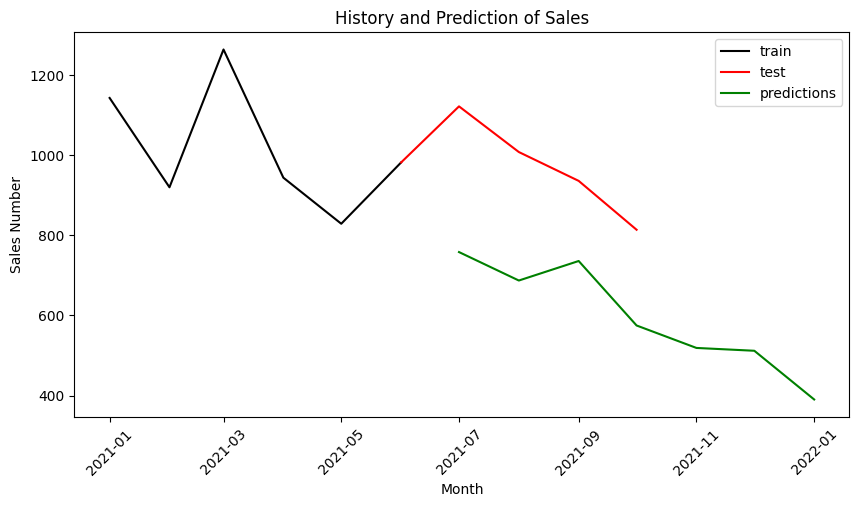

In [38]:
import statsmodels.api as sm
import itertools

y = train['total_sales'].astype('float32')

# Grid Search
p = d = q = range(0,3) # p, d, and q can be either 0, 1, or 2
pdq = list(itertools.product(p,d,q)) # gets all possible combinations of p, d, and q
p2 = d2 = q2 = range(0, 2) # second set of p's, d's, and q's
pdq2 = list(itertools.product(p2,d2,q2)) # simular too code above but for seasonal parameters
s = 12 # here I use twelve but the number here is representative of the periodicty of the seasonal cycle
pdqs2 = [(c[0], c[1], c[2], s) for c in pdq2]
combs = {}
aics = []

# Grid Search Continued
for combination in pdq:
    for seasonal_combination in pdqs2:
        try:
            model = sm.tsa.statespace.SARIMAX(y, order=combination, seasonal_order=seasonal_combination,
                                             enforce_stationarity=False,
                                             enforce_invertibility=False)
            model = model.fit()
            combs.update({model.aic : [combination, seasonal_combination]})
            aics.append(model.aic)

        except:
            continue

best_aic = min(aics)

# Modeling
model = sm.tsa.statespace.SARIMAX(y, order=combs[best_aic][0], seasonal_order=combs[best_aic][1],
                                             enforce_stationarity=False,
                                             enforce_invertibility=False)
model = model.fit()

# prediction
y_pred = model.forecast(len(month_predicted),alpha =0.05)
y_pred_df = pd.DataFrame(y_pred)
y_pred_df.columns = ['predictions']
y_pred_df = y_pred_df.set_index([pd.Index(month_predicted)])

# modif month
y_pred_df['year_month'] = test['year_month']
y_pred_df['year_month'][10] = pd.to_datetime('2021-11', format='%Y-%m')
y_pred_df['year_month'][11] = pd.to_datetime('2021-12', format='%Y-%m')
y_pred_df['year_month'][12] = pd.to_datetime('2022-01', format='%Y-%m')

# plot
plt.figure(figsize=(10,5))
plt.plot( train['year_month'], train['total_sales'], color = "black", label="train")
plt.plot(test['year_month'], test['total_sales'], color = "red", label="test")
plt.plot(y_pred_df['year_month'], y_pred_df['predictions'], color='green', label = 'predictions')
plt.title("History and Prediction of Sales")
plt.ylabel("Sales Number")
plt.xlabel('Month')
plt.xticks(rotation=45)
plt.legend()
plt.show()

### 1.6.3 Model Evaluation

In [39]:
from math import sqrt
from sklearn.metrics import mean_squared_error

rms = sqrt(mean_squared_error(test['total_sales'],y_pred_df['predictions'][0:5]))
print("RMSE: ", rms)

RMSE:  325.68483012381733


# 1.7 Sarima

### 1.7.1 Splitting Data

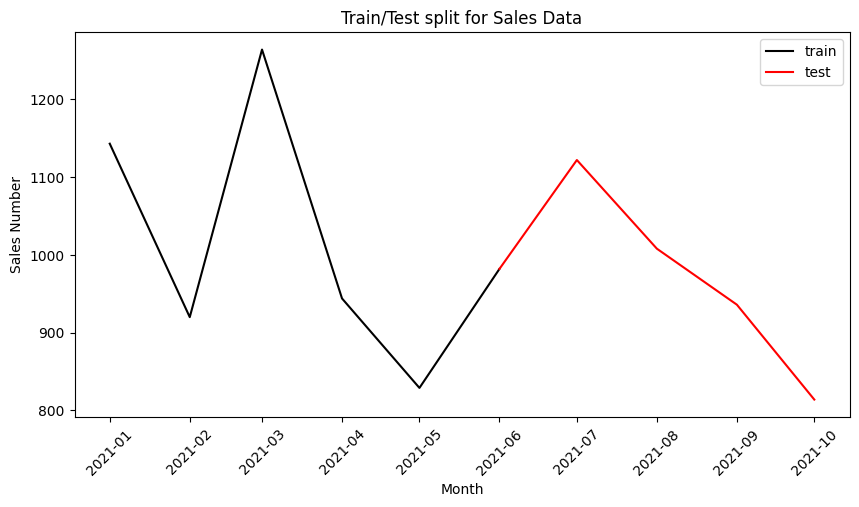

In [40]:
df_f = df_tm_p[:-1]

train = df_f[df_f['year_month'] <= pd.to_datetime('2021-06', format='%Y-%m')]
test = df_f[df_f['year_month'] >= pd.to_datetime('2021-06', format='%Y-%m')]

# plot
plt.figure(figsize=(10,5))
plt.plot( train['year_month'], train['total_sales'], color = "black", label="train")
plt.plot(test['year_month'], test['total_sales'], color = "red", label="test")
plt.title("Train/Test split for Sales Data")
plt.ylabel("Sales Number")
plt.xlabel('Month')
plt.xticks(rotation=45)
plt.legend()
plt.show()

### 1.7.2 Train Model

In [41]:
month_predicted = [*range(5, 17, 1)]

                                     SARIMAX Results                                     
Dep. Variable:                       total_sales   No. Observations:                    6
Model:             SARIMAX(2, 1, 2)x(2, 1, 2, 5)   Log Likelihood                   0.000
Date:                           Fri, 21 Jul 2023   AIC                             18.000
Time:                                   02:05:36   BIC                               -inf
Sample:                                        0   HQIC                               nan
                                             - 6                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1              -0        nan        nan        nan         nan         nan
ar.L2               0        nan        nan

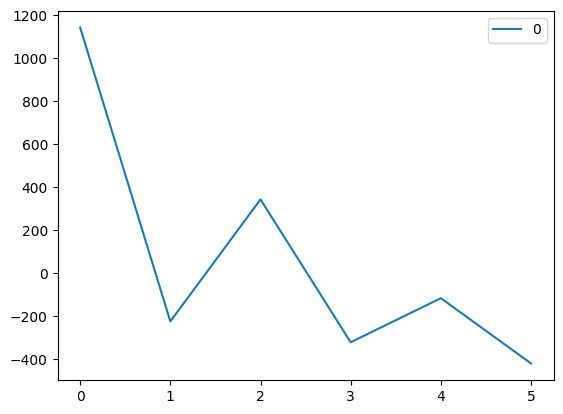

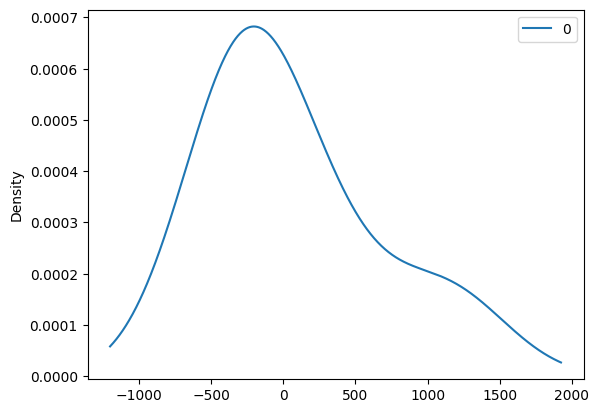

                 0
count     6.000000
mean     68.416619
std     589.439817
min    -418.500286
25%    -295.750000
50%    -169.000000
75%     229.250000
max    1143.000000


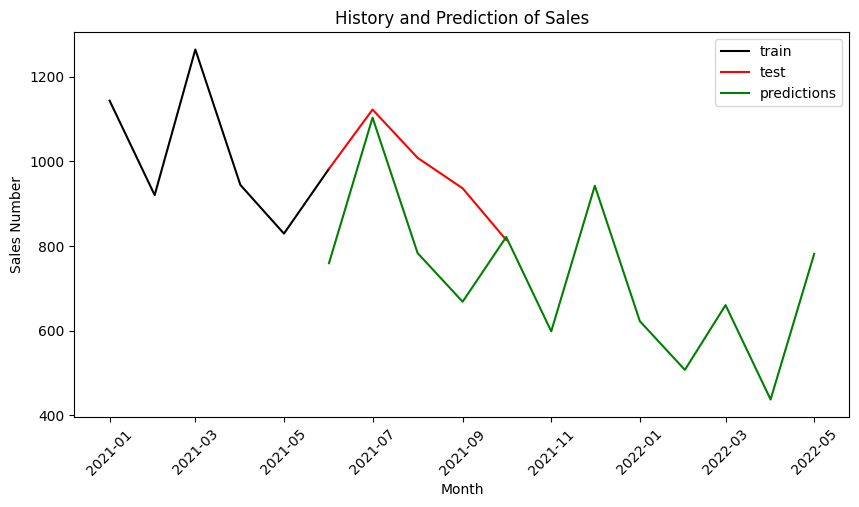

In [42]:
from statsmodels.tsa.arima.model import ARIMA
from pandas import DataFrame
from matplotlib import pyplot
y = train['total_sales']

SARIMAXmodel = SARIMAX(y, order = (2, 1, 2), seasonal_order=(2,1,2,5))
SARIMAXmodel = SARIMAXmodel.fit()
print(SARIMAXmodel.summary())
# line plot of residuals
residuals = DataFrame(SARIMAXmodel.resid)
residuals.plot()
pyplot.show()

# density plot of residuals
residuals.plot(kind='kde')
pyplot.show()
# summary stats of residuals
print(residuals.describe())

# prediction
y_pred = SARIMAXmodel.get_forecast(len(month_predicted))
y_pred_df = y_pred.conf_int(alpha = 0.05)
y_pred_df["predictions"] = SARIMAXmodel.predict(end = 17)
y_pred_df.index = month_predicted
y_pred_out = y_pred_df["predictions"]

# modif month
y_pred_df['year_month'] = test['year_month']
y_pred_df['year_month'][10] = pd.to_datetime('2021-11', format='%Y-%m')
y_pred_df['year_month'][11] = pd.to_datetime('2021-12', format='%Y-%m')
y_pred_df['year_month'][12] = pd.to_datetime('2022-01', format='%Y-%m')
y_pred_df['year_month'][13] = pd.to_datetime('2022-02', format='%Y-%m')
y_pred_df['year_month'][14] = pd.to_datetime('2022-03', format='%Y-%m')
y_pred_df['year_month'][15] = pd.to_datetime('2022-04', format='%Y-%m')
y_pred_df['year_month'][16] = pd.to_datetime('2022-05', format='%Y-%m')

# plot
plt.figure(figsize=(10,5))
plt.plot( train['year_month'], train['total_sales'], color = "black", label="train")
plt.plot(test['year_month'], test['total_sales'], color = "red", label="test")
plt.plot(y_pred_df['year_month'], y_pred_df['predictions'], color='green', label = 'predictions')
plt.title("History and Prediction of Sales")
plt.ylabel("Sales Number")
plt.xlabel('Month')
plt.xticks(rotation=45)
plt.legend()
plt.show()

### 1.7.3 Model Evaluation

In [43]:
from math import sqrt
from sklearn.metrics import mean_squared_error

rms = sqrt(mean_squared_error(test['total_sales'],y_pred_df['predictions'][0:5]))
print("RMSE: ", rms)

RMSE:  185.78912777662742
